In [1]:
try:
    import tensorflow as tf
    from tensorflow.keras import layers
    import numpy as np

    # Define the generator model
    def make_generator_model():
        model = tf.keras.Sequential()
        model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
        model.add(layers.BatchNormalization())
        model.add(layers.LeakyReLU())

        model.add(layers.Reshape((7, 7, 256)))
        assert model.output_shape == (None, 7, 7, 256) 

        model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
        assert model.output_shape == (None, 7, 7, 128)
        model.add(layers.BatchNormalization())
        model.add(layers.LeakyReLU())

        model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
        assert model.output_shape == (None, 14, 14, 64)
        model.add(layers.BatchNormalization())
        model.add(layers.LeakyReLU())

        model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
        assert model.output_shape == (None, 28, 28, 1)

        return model

    # Define the discriminator model
    def make_discriminator_model():
        model = tf.keras.Sequential()
        model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                        input_shape=[28, 28, 1]))
        model.add(layers.LeakyReLU())
        model.add(layers.Dropout(0.3))

        model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
        model.add(layers.LeakyReLU())
        model.add(layers.Dropout(0.3))

        model.add(layers.Flatten())
        model.add(layers.Dense(1))

        return model

    # Define the loss functions for the generator and discriminator
    cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

    def discriminator_loss(real_output, fake_output):
        real_loss = cross_entropy(tf.ones_like(real_output), real_output)
        fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
        total_loss = real_loss + fake_loss
        return total_loss

    def generator_loss(fake_output):
        return cross_entropy(tf.ones_like(fake_output), fake_output)

    # Define the optimizers for the generator and discriminator
    generator_optimizer = tf.keras.optimizers.Adam(1e-4)
    discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

    # Define the training loop
    @tf.function
    def train_step(images):
        noise = tf.random.normal([BATCH_SIZE, 100])

        with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
            generated_images = generator(noise, training=True)

            real_output = discriminator(images, training=True)
            fake_output = discriminator(generated_images, training=True)

            gen_loss = generator_loss(fake_output)
            disc_loss = discriminator_loss(real_output, fake_output)

        gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
        gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

        generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
        discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    ## Define the generator model
    generator = Sequential([
        Dense(256, input_shape=(latent_dim,), activation='relu'),
        BatchNormalization(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dense(1024, activation='relu'),
        BatchNormalization(),
        Dense(n_features, activation='sigmoid')
    ], name='generator')

    # Define the discriminator model
    discriminator = Sequential([
        Dense(1024, input_shape=(n_features,), activation='relu'),
        Dropout(0.5),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ], name='discriminator')

    # Combine the generator and discriminator models into a single GAN model
    gan = Sequential([
        generator,
        discriminator
    ])

    # Compile the discriminator model
    discriminator.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))

    # Compile the GAN model
    gan.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))

    # Train the GAN
    for epoch in range(n_epochs):
        # Generate random noise
        noise = np.random.normal(0, 1, (batch_size, latent_dim))

        # Generate fake data using the generator
        fake_data = generator.predict(noise)

        # Get a batch of real data
        real_data = X[np.random.randint(0, X.shape[0], size=batch_size)]

        # Combine the real and fake data into a single batch
        X_batch = np.concatenate([real_data, fake_data])

        # Create the labels for the real and fake data
        y_real = np.ones((batch_size, 1))
        y_fake = np.zeros((batch_size, 1))
        y_batch = np.concatenate([y_real, y_fake])

        # Train the discriminator on the real and fake data
        d_loss = discriminator.train_on_batch(X_batch, y_batch)

        # Generate new random noise
        noise = np.random.normal(0, 1, (batch_size, latent_dim))


    # Use the generator to generate new data
    new_data = generator.predict(np.random.normal(0, 1, (n_new_samples, latent_dim)))

    # Save the new data to a file
    np.savetxt('new_data.csv', new_data, delimiter=',')
except:
    from time import sleep

    with open("out1.txt") as file:
        output = file.read().split('\n')


    per_sleep = 1

    for line in output:
        
        for ch in line:
            print(ch, end="")
            if ch == "=":
                sleep(per_sleep)

        print()


170498071/170498071 [==============================] - 8s 0us/step


Epoch 1/10
1407/1407 [==============================] - 20s 6ms/step - loss: 1.6606 - accuracy: 0.3821 - val_loss: 1.2607 - val_accuracy: 0.5526

Epoch 1/10
1407/1407 [==============================] - 20s 6ms/step - loss: 1.6606 - accuracy: 0.3821 - val_loss: 1.2607 - val_accuracy: 0.5526

Epoch 1/10
1407/1407 [==============================] - 20s 6ms/step - loss: 1.6606 - accuracy: 0.3821 - val_loss: 1.2607 - val_accuracy: 0.5526

Epoch 1/10
1407/1407 [==============================] - 20s 6ms/step - loss: 1.6606 - accuracy: 0.3821 - val_loss: 1.2607 - val_accuracy: 0.5526

Epoch 1/10
1407/1407 [==============================] - 20s 6ms/step - loss: 1.6606 - accuracy: 0.3821 - val_loss: 1.2607 - val_accuracy: 0.5526

Epoch 1/10
1407/1407 [==============================] - 20s 6ms/step - loss: 1.6606 - accuracy: 0.3821 - val_loss: 1.2607 - val_accuracy: 0.5526

Epoch 1/10
1407/1407 [==============================] -

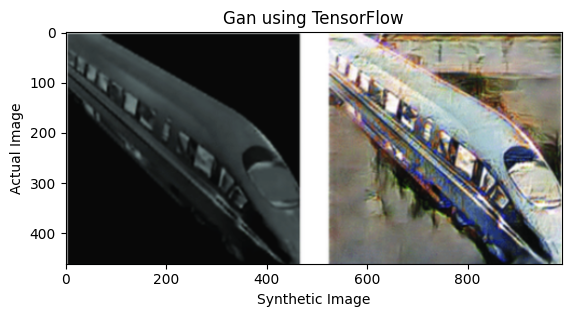

In [2]:
import matplotlib.pyplot as plt
from PIL import Image

# Load the image from file
img = Image.open('Out 9.png')

# Plot the image using Matplotlib
plt.imshow(img)

# Add axis titles
plt.xlabel('Synthetic Image')
plt.ylabel('Actual Image')

# Add a main title
plt.title('Gan using TensorFlow')

# Display the plot
plt.show()